# Neural Networks and Convolutional Neural Networks LI Essential Training

Instructor: Jonathan Fernandes

Take a deep dive into neural networks and convolutional neural networks, two key concepts in the area of machine learning. In this hands-on course, instructor Jonathan Fernandes covers fundamental neural and convolutional neural network concepts. Jonathan begins by providing an introduction to the components of neural networks, discussing activation functions and backpropagation. He then looks at convolutional neural networks, explaining why they're particularly good at image recognition tasks. He also steps through how to build a neural network model using Keras. Plus, learn about VGG16, the history of the ImageNet challenge, and more.

CNNs provide better performance for Image Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(image, cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

#### Neurons and artificial neurons
* The **neuron** is the basic working unit of the brain; they transmit information to other nerve cells, muscles, or gland cells.
* Most neurons have a cell body, an axon, and dendrites
* They are excitable, produce electrical events called "action potentials", aka "nerve impulses" or "spikes"
* **Nerve impulses** are the basic currency of the brain
    * They allow neurons to **communicate** with each other
    * They allow for **computations** to be performed
    * They allow for **information processing**
* Neurons communicate by sending out an electrical signal causing a chain reaction when they are stimulated by signals
    * Every neuron on the path takes up the signal and passes it to the next neuron
    * The dendrites pick up the impulse and send the message to the axon, which then delivers it to the next neuron
* Once a message hits its target (e.g. a muscle), a neurotransmitter is stimulated and causes action

#### Artificial Neurons
* **Rosenblatt's Mark I Perceptron:** 1957 Rosenblatt started working on first artificial neural network 

#### Gradient Descent
* We need to find a way to learn the neuron's parameters (weight and bias) from the data
* **Gradient descent** is an optimizing algorithm which is used to iterate through different combinations of weights to find the best combination of weights that minimizes the error
    * Learning rate to minimize the loss
    * Calculate the gradient at current position
    
```
while (gradient != 0)
if (gradient < 0)
    move right
if (gradient > 0)
    move left
```
   * We update the gradient slowly to find the minimum loss until we have reached the lowest/optimal position
   * Two things to look out for:
       * Which direction to go to get the minimum of the loss function
       * the **learning rate**, which tells us how big the steps should be to get there

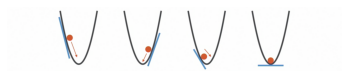

In [3]:
show_image(plt.imread('data/gradient_descent.png'))

The **learning rate** determines the size of the steps we take to reach the local minimum 

#### Key Challenge
* The function applied to the network output in Logistic Regression is nondifferentiable
* A work-around is to use the **logistic sigmoid function** and classify depending on if the function > 0.5

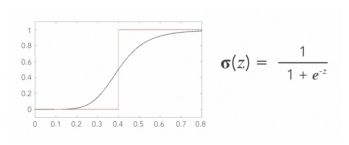

In [5]:
show_image(plt.imread('data/logistic_sigmoid.png'))

* This will give a value of zero or one, where the cut-off point *could* be the halfway point.

#### Loss function
* If we can find a suitable loss function, we can train the neuron using gradient descent
* **Sum of squared errors** is common
* The **cross-entropy** loss function is better suited for **logistic functions**

#### XOR Challenge and Solution
* **XOR Challenge:** A single artificial neuron can only learn linearly separable functions, but XOR can't be separate by a single line (**there is no linear function that can be applied to separate the points on an XOR plot**)
* 1970-1980 : "Cold Dark Winter of AI Research" because scientists concluded that if the simple XOR problem couldn't be solved with AI, then it wasn't worth investing time and research into AI
* **XOR** or **Exclusive Or** is a Boolean operator (like "and" or "or")
* We need to introduce nonlinearity into the function our system computes
* We need to extend a single neuron to a neural network

#### Neural Networks
* How do we extend from a single neuron to a neural network?
* In a **Multilayer Perceptron**, perceptrons are divided up into multiple layers
* The output of one perceptron will be the input to another perceptron

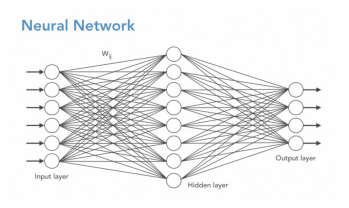

In [6]:
show_image(plt.imread('data/neural_network.png'))

* Each of the perceptrons in the above diagram behave like the single perceptron:
    * The input is a linear combination of the sum of the products of the weight times the input
    * The input to this perceptron is a linear combination of all of the outputs multiplied by weight, indicated with $W_{ij}$, of perceptrons from the previous layer
    * The output of this perceptron is connected to all of the perceptrons in the next layer
    * We introduced the non-linearity by insuring that the activation function we used, the function that determines if the neuron triggers or not, is non-linear
    * So, we have an **input layer**, and an **output layer**, and if you have any layers in between, as shown in the diagram above, they are known as a **hidden layer**. 
    * Above there is only one hidden later, but in reality there could be multiple hidden layers
    * A **deep Neural Network** is then a Neural Network with one or more hidden layers
    
#### Additional Properties of Neural Networks  
* **Cybenko's Theorem:** (1989) suggests that one hidden layer is sufficient to learn any function and create a model with a close approximation
    * This means that a neural network with one hidden layer can predict an output, or a close approximation of an output, even if the output is compicated
    * You will find that many popular Neural Networks have 10, 20, 50, and more hidden layers (as these models can provide more accurate results)

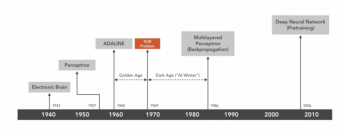

In [7]:
show_image(plt.imread('data/nn_timeline.png'))

* Massive increase in availability of images (partially via `Imagenet` and also through the massive computing capabilities of GPUs in recent years)

## Chapter 2: Components of Neural Networks

#### Activation functions
* The artificial neuron does the weighted sums calculation
* The **activation function** determines if a neuron fires or not
* To ensure that there is some non-linearity in our network, we need to make sure that these activation functions are non-linear
* **Candidates:**
    * step function
    * *we don't want a linear function, as we will end up with the XOR problem*
        * Additionally, multiple layers with linear activation layers can (always) be replaced by a single linear function
        * No matter how many layers- if all of them are linear, the final activation of the last layer will also be linear
   
* Problem with sigmoid function: vanishing gradient problem- near the boundaries, the network doesn't learn quickly; this is because the gradient or slope is almost zero at both ends
* **Tanh** or hyperbolic tangent:
    * similar problems to sigmoid
    * as output is between -1 and 1, it doesn't lend itself as well to binary classification problems as the sigmoid function
* **ReLU** or Rectified Linear Unit:
    * f(x):
        * 0 for x<0
        * x for x=>0
    * ReLU is **nonlinear**
    * Combinations of ReLU are **non-linear**
    * Less computationally expensive than a sigmoid function
    * **ReLU is one of the more well-known and used activation functions**
* How do you know the best one to use? Experiment and find out which provides the best performance for your particular model. ReLU is often a good starting point.

#### Backpropagation and Hyperparameters
* **Backpropagation** was introduced in 1985 by Hinton, Rumelhart, and Williams
    * Backpropagation: What backpropagation tries to achieve is quite simple; we have the input to the network and our neural network provides some output. We then want to compare that with the expected or actual output. We compute the loss function and take the gradient of the loss function

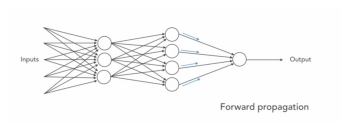

In [19]:
show_image(plt.imread('data/forward_propagation.png'))

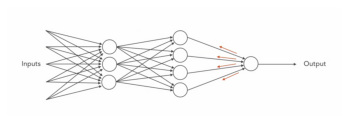

In [20]:
show_image(plt.imread('data/backpropagation_1.png'))

* The backwards part of the name is because the calculation of the gradient proceeds backwards throughout the network with the gradient of the final layer of weights being calculated first and the gradient of the first layer of weights being calculated last
* Partial computations of the gradient from one layer are reused in the computation of the gradient for the previous layer. This backwards flow of the error information allows for efficient computation of the gradient at each layer

#### Hyperparameters
* These must be set before we start training
* Considerations
    * What activation function for the neurons?
    * What learning rate? (remember this is part of gradient descent)
    * How many neurons in each layer?
    * How many hidden layers?

#### Neural Network Visualization
* [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.01187&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

* **Epoch** = complete pass through the dataset
* 2 components of gradient descent:
    * direction to move in
    * size of the step: learning rate

### Neural Network Implementation in Keras
* Keras is a high-level neural network's API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
### Components of Keras
### $\Rightarrow$ `model.compile()`
* **`compile(self, optimizer, loss, metrics=None, ...)`**
* Before training a model, you need to configure the learning process, which is done via the compile method
* Compile recieves 2 parameters:
    * **optimizer:** an algorithm that, given a set of parameters, returns one with a smaller loss function
        * You can either call it by name (use the default parameter values) or;
        * Instantiate an optimizer before passing it to `model.compile()`
    * **loss:** the objective function for measuring the accuracy of performance error of a neural network
    * **metrics:** the list of metrics
        * for any classification problem, you will want to set this `metrics` to accuracy (??)
        
#### Optimizers
* Three common optimizers:
    * **SGD**: 
        * Stochastic gradient descent optimizer
        * Includes support for momentum, learning rate decay, and Nesterov momentum
    * **RMSprop**:
        * A good choice for recurrent neural networks
    * **Adam:**
        * An algorithm for first-order gradient-based optimization of stochastic objective functions
        * In our examples we will use Adam as our optimizer of choice
        
#### Loss
* Some common loss functions:
    * **MSE:**
        * `mean_squared_error` computes the element-wise square
        * for regression problems
    * **categorical_crossentropy:*
        * `categorical_crossentropy`: computes categorical crossentropy between predictions and targets
        * often used when your target has multiple classes
    * **Binary crossentropy:**
        * `binary_crossentropy` computes the binary crossentropy between predictions and targets
        * often used when your target has two classes
        
#### Metrics
* Metrics are functions that are used to judge the performance of your model 
* For any classification problems, you will want to use accuracy as your `metrics` (??)
    * `compile(optimizer, loss, metrics=['accuracy'])`

#### Setting up a Microsoft account on Azure
* Use [this notebook](https://notebooks.azure.com/jonfernandes/libraries/NeuralNetworks)

### Introduction to MNIST
[This notebook for MNIST dataset](http://yann.lecun.com/exdb/mnist/)

The **MNIST** dataset is the handwritten dataset and is already available as one of the data sets in Keras
* Some of the data will need to be in the right format before we can use it in our model, and so we will need to do some pre-processing

### Convolutions
* Fully connected neural networks typically don't work well on images
* This is because if each pixel is an input, then as we add more layers, the amount of parameters increases exponentially: doesn't scale well.
* Example:
    * 32 x 32 x 3 image(32 pixels wide, 32 pixels high, 3 color channels):
    * 32 x 32 x 3 = 3,072 weights
    * A single fully-connected neuron in a single hidden layer of a neural network would have **3,072 weights**
    * A number of parameters this large can quickly lead to overfitting
        * We can use smaller images, but we will lose information
    * One thing we have not taken into account:
        * **What makes one image distinguishable from another is its spatial structure so areas close to each other are highly significant for something like an image

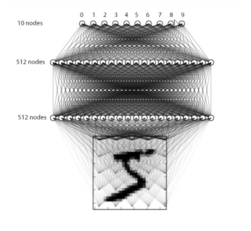

In [28]:
show_image(plt.imread('data/model_outline.png'))

### Zero padding and pooling

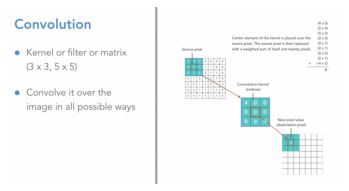

In [22]:
show_image(plt.imread('data/convolution.png'))

* During the forward pass, we slide or **convolve** each filter across the width and height of the input volume and compute dot products between the entry of the filter and the input at any position
* As we slide the filter over the width and height of the input volume, we will produce a 2-dimensional activation map that will give the responses of that filter at every spatial position
* This "convolving" operation is basically moving this filter across our entire image in this way from left to right and from top to bottom.
* One of the big challenges of convolving is that we lose data from our original image because **convolving decreases the spatial size**.
* **If we want to preserve the spacial size of the input volume, so the input and output width and height are the same, then zero padding is a helpful technique.**


#### Zero padding
The image output size is given by the following:
$\frac{N - F + 2P}{S} + 1$
* **F:** size of filter
* **S:** stride
* **N:** size of image
* **P:** amount of padding 


* The size of the zero padding is a hyperparameter that allows us to control the spatial size

### Max Pooling

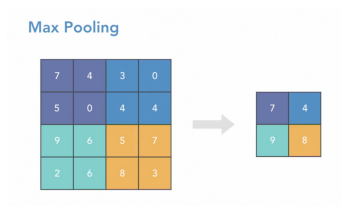

In [26]:
show_image(plt.imread('data/max_pooling.png'))

* With max pooling, we normally work with a 2 x 2 block with a stride size of 2
* This means that we want to take an input which is 4 x 4 and we want to reduce it to 2 x 2
* We **capture the max value from each block.**

#### Average pooling
* Alternatively, we could do average pooling

#### Why pooling?
* Form of non-linear downsampling
* Reduces chances of overfitting
* As the height and width decrease, you want to increase the number of kernels

#### Why Max Pooling?
* Convolutions "light up" when they detect a particular feature in a region of an image
* When downsampling, it makes sense to preserve the parts that were most activated

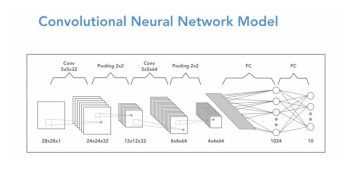

In [29]:
show_image(plt.imread('data/convolutional_model.png'))

* Note that you always need to Flatten() after convolution layers and before Dense or fully-connected layers

### Enhancements to CNNs
* Here we focus on two:
    * **Dropout:**
        * purpose: prevent overfitting
        * forces the model to learn redundant representation in the data.
        * **randomly killing each neuron in layer of a training set with probability *p*.**
        * *p* determined by you (common choice: p= 0.5, meaning half the neurons are dropped during training)
        * Only done on training data
        * **Model is forced to learn more general and more robust patterns in the data**
    * **Image augementation:**
        * Taking images in training data set and manipulating them to create many altered versions of the same image, which means:
            * There are more images for our model to train on
            * Image manipulations make our model more robust
            * Keras allows for image augmentation, where we generate batches of image data with realtime image augmentation
            * The data will be looped over in batches indefinitely
            